## Wks 9-10 Assignment
## Lincoln Brown
## DSC540-T301 
## Professor Williams

## Exercise 1 
## Activity 9
## Data Wrangling with Python
## Pg. 294


## Step 1

In [70]:
# Step 1: Import the necessary libraries
from bs4 import BeautifulSoup as bs
from IPython.display import Image
import pandas as pd
import re
import requests
import ssl

## Step 2

In [71]:
# Step 2: Check the SSL Certificate
# Ignore SSL certificate errors
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE

## Step 3

In [72]:
# Step 3: Read the HTML from the url
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

## Step 4

In [73]:
# Step 4: Write a function to check the status of the web request
def check_response(response):
    codes = {200: "Success", 201: "Created", 202: "Accepted", 301: "Moved Permanently",
             303: "See Other", 304: "Not Modified", 307: "Temporary Redirect",
             400: "Bad Request", 401: "Unauthorized", 403: "Forbidden", 404: "Not Found",
             410: "Gone", 500: "Internal Server Error", 503: "Service Unavailable"}
    if response.status_code == 200:
        print("Request Successful")
        print(f"Request Status Code: {codes[response.status_code]}")
    else:
        print("Request Failed")
        print(f"Request Status Code: {codes[response.status_code]}")
    

In [74]:
# Check the response
check_response(response)

Request Successful
Request Status Code: Success


## Step 5

In [75]:
# Step 5 Decode the response and pass this on to Beautiful Soup for HTML parsing
# This first way is how the book would go about it
contents = response.content.decode(response.encoding)

# I would normally just use response.text
soup = bs(response.text)

# I prefer my way because the output is prettified
# Making it much easier to read
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords"/>
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright"/>
<link href="/gutenberg/favicon.ico?v=1.1" rel="shortcut icon"/>
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" property="og:url"/>


In [76]:
contents

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n <meta charset="UTF-8"/>\n\n<title>Top 100 | Project Gutenberg</title>\n <link rel="stylesheet" href="/gutenberg/style.css?v=1.1">\n <link rel="stylesheet" href="/gutenberg/collapsible.css?1.1">\n <link rel="stylesheet" href="/gutenberg/new_nav.css?v=1.321231">\n<link rel="stylesheet" href="/gutenberg/pg-desktop-one.css">\n <meta name="viewport" content="width=device-width, initial-scale=1">\n <meta name="keywords" content="books, ebooks, free, kindle, android, iphone, ipad"/>\n <meta name="google-site-verification" content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io"/>\n <meta name="alexaVerifyID" content="4WNaCljsE-A82vP_ih2H_UqXZvM"/>\n <link rel="copyright" href="https://www.gnu.org/copyleft/fdl.html"/>\n <link rel="shortcut icon" href="/gutenberg/favicon.ico?v=1.1"/>\n\n <meta property="og:title"        content="Project Gutenberg" />\n <meta property="og:type"         content="website" />\n <meta property="

## Step 6

In [77]:
# Step 6: Find all the href tags and store them in the list of links.
# Check the list, print the first 30 elements
link_list = []
a_tags = soup.findAll('a', href=True)
for link in a_tags:
    print(link)
    link_list.append(link['href'])

print(f"Number of links: {len(link_list)}")
    
# Print the first 30 elements
for index,link in enumerate(link_list):
    if index < 600:
        print(link)

<a class="no-hover" href="/" id="main_logo">
<img alt="Project Gutenberg" draggable="false" src="/gutenberg/pg-logo-129x80.png"/>
</a>
<a href="/about/">About
          <span class="drop-icon">▾</span>
</a>
<a href="/about/">About Project Gutenberg</a>
<a href="/policy/collection_development.html">Collection Development</a>
<a href="/about/contact_information.html">Contact Us</a>
<a href="/about/background/">History &amp; Philosophy</a>
<a href="/policy/permission.html">Permissions &amp; License</a>
<a href="/policy/privacy_policy.html">Privacy Policy</a>
<a href="/policy/terms_of_use.html">Terms of Use</a>
<a href="/ebooks/">Search and Browse
      	  <span class="drop-icon">▾</span>
</a>
<a href="/ebooks/">Book Search</a>
<a href="/ebooks/bookshelf/">Bookshelves</a>
<a href="/browse/scores/top">Frequently Downloaded</a>
<a href="/ebooks/offline_catalogs.html">Offline Catalogs</a>
<a href="/help/">Help
          <span class="drop-icon">▾</span>
</a>
<a href="/help/">All help topics →<

## Step 7 and Step 8

In [78]:
# Step 7
# Use a regular expression to find the file numbers in the links
# Use the findall method
# Create a pattern that will look for any number of digits
pattern = re.compile(r"([0-9]+)")
# Create an empty list to save the file numbers to

# Step 8 initialize the empty list to save the file numbers to 
file_nums = []
# Need an index to keep track of when we have reached 100 ebooks
# Since there are multiple ebook links in the page
index = 0
# Iterate through the link list and grab the pertinent file numbers
for link in link_list:
# We are using the ebooks tag to grab the first 100 file numbers because
# searching by index is not reliable
    if link.__contains__("/ebooks/"):
        file_num = re.findall(pattern, link)
        # Each list of most popular ebooks goes to 100, but we only want the first list
        if len(file_num) > 0 and index < 100:
            index += 1
            #print(file_num)
            file_nums.append(file_num)

# Verify our outputs
print(len(file_nums))
print(file_nums)

100
[['1513'], ['84'], ['33283'], ['1342'], ['11'], ['46'], ['345'], ['72015'], ['64317'], ['5200'], ['174'], ['2600'], ['25344'], ['1232'], ['98'], ['43'], ['2701'], ['28054'], ['1661'], ['1260'], ['844'], ['12116'], ['6130'], ['1952'], ['1399'], ['72016'], ['72030'], ['1400'], ['27827'], ['2554'], ['2542'], ['76'], ['1080'], ['72022'], ['72021'], ['3207'], ['2591'], ['55'], ['4300'], ['30254'], ['45'], ['5740'], ['74'], ['2000'], ['1184'], ['2680'], ['2814'], ['72018'], ['10007'], ['219'], ['72029'], ['996'], ['67098'], ['768'], ['72014'], ['1998'], ['8800'], ['16'], ['72017'], ['600'], ['244'], ['932'], ['100'], ['4363'], ['41'], ['158'], ['1727'], ['58585'], ['24869'], ['72020'], ['8492'], ['72026'], ['120'], ['23'], ['408'], ['26184'], ['5827'], ['205'], ['1497'], ['72031'], ['16328'], ['10'], ['161'], ['31284'], ['25282'], ['72011'], ['35'], ['36'], ['2148'], ['6133'], ['72032'], ['2852'], ['514'], ['35899'], ['72019'], ['12'], ['135'], ['236'], ['730'], ['72013']]


## Step 9

In [79]:
# Step 9
# Print the first 2,000 characters of soup.text

soup.text[:2000]

"\n\n\nTop 100 | Project Gutenberg\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMenu▾\n\n\n\nAbout\n          ▾\n\n▾\n\n\nAbout Project Gutenberg\nCollection Development\nContact Us\nHistory & Philosophy\nPermissions & License\nPrivacy Policy\nTerms of Use\n\n\n\nSearch and Browse\n      \t  ▾\n\n▾\n\n\nBook Search\nBookshelves\nFrequently Downloaded\nOffline Catalogs\n\n\n\nHelp\n          ▾\n\n▾\n\n\nAll help topics →\nCopyright How-To\nErrata, Fixes and Bug Reports\nFile Formats\nFrequently Asked Questions\nPolicies →\nPublic Domain eBook Submission\nSubmitting Your Own Work\nTablets, Phones and eReaders\nThe Attic →\n\n\nDonate\n\n\n\n\n\n\n\n\n\n\nDonation\n\n\n\n\n\n\n\nFrequently Viewed or Downloaded\nThese listings are based on the number of times each eBook gets downloaded.\n      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

In [80]:
# Split the text at the new line characters
split_text = soup.text.splitlines()
# There are two lines that match the Top 100 EBooks yesterday string
# So I will use an offset of 10 to skip the unnecessary lines
start_index = split_text.index("Top 100 EBooks yesterday") + 10
print(start_index)

# Create an empty list to hold the names
title_list = []
for x in range(100):
    # Use an x offset so that we can get through the range
    line = split_text[start_index + x]
    #print(line)
    title_start, title_end =  re.match(r'[\w \.]*', split_text[start_index + x]).span()
    title = line[title_start:title_end]
    title_list.append(title)
    print(title)

print(title_list)

122
Romeo and Juliet by William Shakespeare 
Frankenstein
Calculus Made Easy by Silvanus P.  Thompson 
Pride and Prejudice by Jane Austen 
Alice
A Christmas Carol in Prose
Dracula by Bram Stoker 
A trace of memory by Keith Laumer 
The Great Gatsby by F. Scott  Fitzgerald 
Metamorphosis by Franz Kafka 
The Picture of Dorian Gray by Oscar Wilde 
War and Peace by graf Leo Tolstoy 
The Scarlet Letter by Nathaniel Hawthorne 
The Prince by Niccolò Machiavelli 
A Tale of Two Cities by Charles Dickens 
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson 
Moby Dick
The Brothers Karamazov by Fyodor Dostoyevsky 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Jane Eyre
The Importance of Being Earnest
Struwwelpeter
The Iliad by Homer 
The Yellow Wallpaper by Charlotte Perkins Gilman 
Anna Karenina by graf Leo Tolstoy 
A practical treatise on coach
And miles to go before I sleep by William F. Nolan 
Great Expectations by Charles Dickens 
The Kama Sutra of Vatsyayana by Va

## Exercise 2 
## Activity 10
## Data Wrangling with Python
## Pg. 295

## Step 1

In [81]:
#Step 1
# Import urllib.request, urllib.parse, urllib.error, json
import json
import os
import urllib.request
import urllib.parse
import urllib.error


## Step 2-3
Load the api key and store it in a JSON file

## Step 4
Open the APIkeys.json file

In [82]:
key_file = 'omdb_key.json'
secret_key = ""
with open(key_file, 'r') as api_file:
    json_key = json.load(api_file)
    secret_key = json_key['api_key']

## Step 5
Assign the portal and key to a variable, skipped step 6 because I went about it using a dictionary

In [83]:
omdb_portal = 'http://www.omdbapi.com/?'
api_key = f'apikey={secret_key}&'
title = 'Halloween'
# Example URL that works
# http://www.omdbapi.com/?apikey=fdd5b99b&t=Titanic

In [84]:
# Create the url's
# test_url is for my own sanity
title_url = f'http://www.omdbapi.com/?{api_key}&t={title}'
poster_url = f'http://img.omdbapi.com/?t={title}&{api_key}'
test_url = f'http://www.omdbapi.com/?apikey=fdd5b99b&t={title}'
# Again, made a request through the request library for my own sanity
r = requests.get(title_url)
# Per the urllib.
values = {'apikey': secret_key,
          't': title}
# Build out the request data using urlencode
request_data = urllib.parse.urlencode(values)
# Make sure it is a ascii string
request_data.encode('ascii')
# Build the url
url = omdb_portal + request_data
# create the requests
request = urllib.request.Request(url)
# Submit the request
with urllib.request.urlopen(request) as response:
    data = response.read()

json_data = json.loads(data)


## Step 7
Write a print_json function

In [85]:
# Simple print function
def print_json(json_data):
    for key, value in json_file:
        print(key,value)

In [86]:
# Fancier, and a little more fun print function
def print_json_stylized(json_data):
    title = json_data['Title']
    year = json_data['Year']
    plot = json_data['Plot']
    rating = json_data['Rated']
    awards = json_data['Awards']
    actors = json_data['Actors']
    poster = json_data['Poster']
    if awards == 'N/A':
        output = f"Check out {title}! Released in {year}, this unsung film starts {actors}."
        print(output)
    elif awards != 'N/A':
        output = f"""Check out {title}! Released in {year}, this critically acclaimed film is rated {rating}        
{plot}
Starring: {actors}
Full details below:"""
        print(output)
        for key, value in json_data.items():
            if value != 'N/A':
                print(key,value)
        

In [87]:
# Test out the function
print_json_stylized(json_data)

Check out Halloween! Released in 1978, this critically acclaimed film is rated R        
Fifteen years after murdering his sister on Halloween night 1963, Michael Myers escapes from a mental hospital and returns to the small town of Haddonfield, Illinois to kill again.
Starring: Donald Pleasence, Jamie Lee Curtis, Tony Moran
Full details below:
Title Halloween
Year 1978
Rated R
Released 27 Oct 1978
Runtime 91 min
Genre Horror, Thriller
Director John Carpenter
Writer John Carpenter, Debra Hill
Actors Donald Pleasence, Jamie Lee Curtis, Tony Moran
Plot Fifteen years after murdering his sister on Halloween night 1963, Michael Myers escapes from a mental hospital and returns to the small town of Haddonfield, Illinois to kill again.
Language English
Country United States
Awards 9 wins & 3 nominations
Poster https://m.media-amazon.com/images/M/MV5BNzk1OGU2NmMtNTdhZC00NjdlLWE5YTMtZTQ0MGExZTQzOGQyXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings [{'Source': 'Internet Movie Database', 'Value':

## Step 7 cont.
Write a save_poster function

In [88]:
def save_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    file_type = poster_url.split(".")[-1]
    poster_folder = './posters'
    poster_img = urllib.request.urlopen(poster_url).read()
    if not os.path.isdir(poster_folder):
        os.mkdir(poster_folder)
    poster_file = f"{poster_folder}/{title}_poster.{file_type}"
    with open(poster_file, 'wb') as file_out:
        file_out.write(poster_img)

## Step 9
Write a search_movie function

In [89]:
# Create a function to search for a movie
def search_movie(title):
    # Import api key section #
    key_file = 'omdb_key.json'
    secret_key = ""
    try:
        with open(key_file, 'r') as api_file:
            json_key = json.load(api_file)
            secret_key = json_key['api_key']
    except Exception as e: 
        print(e)
        print("Error finding api key.")
    # Request building section #
    omdb_port = 'http://www.omdbapi.com/?'
    values = {'apikey': secret_key,
              't': title}
    request_data = urllib.parse.urlencode(values)
    request_data.encode('ascii')
    url = omdb_portal + request_data
    # Request submittal section #
    try:
        print(f"Attempting to connect to {url}")
        request = urllib.request.Request(url)
        with urllib.request.urlopen(request) as response:
            data = response.read()
            
        json_data = json.loads(data)
        if json_data['Response'] == 'True':
            print("Movie data found!")
            print_json_stylized(json_data)
            if json_data["Poster"] != "N/A":
                display(Image(json_data['Poster']))
                looper = True
                while looper == True:
                    poster_input = input("Would you like to save the movie poster? Y/N")
                    if poster_input[0].lower() == 'y':
                        save_poster(json_data)
                        looper = False
                    elif poster_input[0].lower() == 'n':
                        looper = False
                    else:
                        print("Invalid input")
        else:
            print("Movie not found")
            print(f"Error: {json_data['Error']}")
            
    # Catch Errors
    except urllib.Error.URLError as e:
        print(f"Error connecting to {url}")
        print(f"Error: {e.reason}")
    # Return JSON data
    return json_data

## Step 10
Test the search movie function by entering Titanic

Attempting to connect to http://www.omdbapi.com/?apikey=fdd5b99b&t=Titanic
Movie data found!
Check out Titanic! Released in 1997, this critically acclaimed film is rated PG-13        
A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Starring: Leonardo DiCaprio, Kate Winslet, Billy Zane
Full details below:
Title Titanic
Year 1997
Rated PG-13
Released 19 Dec 1997
Runtime 194 min
Genre Drama, Romance
Director James Cameron
Writer James Cameron
Actors Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language English, Swedish, Italian, French
Country United States, Mexico
Awards Won 11 Oscars. 126 wins & 83 nominations total
Poster https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg
Ratings [{'Source': 'Internet Movie Dat

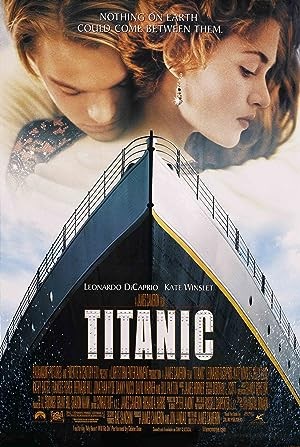

Would you like to save the movie poster? Y/Ny


{'Title': 'Titanic',
 'Year': '1997',
 'Rated': 'PG-13',
 'Released': '19 Dec 1997',
 'Runtime': '194 min',
 'Genre': 'Drama, Romance',
 'Director': 'James Cameron',
 'Writer': 'James Cameron',
 'Actors': 'Leonardo DiCaprio, Kate Winslet, Billy Zane',
 'Plot': 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
 'Language': 'English, Swedish, Italian, French',
 'Country': 'United States, Mexico',
 'Awards': 'Won 11 Oscars. 126 wins & 83 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.9/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '88%'},
  {'Source': 'Metacritic', 'Value': '75/100'}],
 'Metascore': '75',
 'imdbRating': '7.9',
 'imdbVotes': '1,248,724',
 'imdbID': 'tt0120338',
 'Type': 'movie',
 'DVD': '01 Jun 2014',
 'BoxOffice': '$674

In [90]:
search_movie("Titanic")

## Step 11
Test the search_move function by searching for "Random_error

In [91]:
search_movie("Random_error")

Attempting to connect to http://www.omdbapi.com/?apikey=fdd5b99b&t=Random_error
Movie not found
Error: Movie not found!


{'Response': 'False', 'Error': 'Movie not found!'}

## Exercise 3
Connect to an API of your choice and do a simple data pull
Perform a GET call on the API to get a subset

In [92]:
def print_api(api_entry):
    api = api_entry['API']
    description = api_entry['Description']
    link = api_entry['Link']
    category = api_entry['Category']
    print(f"API: {api}")
    print(f"Description: {description}")
    print(f"Link: {link}")
    print(f"Category: {category}")
        

In [93]:
api_url = 'https://api.publicapis.org/entries'
api_request = requests.get(api_url)
api_data = json.loads(api_request.content)

for entry in api_data['entries'][0:10]:
    print_api(entry)
    print("\n")
      

API: AdoptAPet
Description: Resource to help get pets adopted
Link: https://www.adoptapet.com/public/apis/pet_list.html
Category: Animals


API: Axolotl
Description: Collection of axolotl pictures and facts
Link: https://theaxolotlapi.netlify.app/
Category: Animals


API: Cat Facts
Description: Daily cat facts
Link: https://alexwohlbruck.github.io/cat-facts/
Category: Animals


API: Cataas
Description: Cat as a service (cats pictures and gifs)
Link: https://cataas.com/
Category: Animals


API: Cats
Description: Pictures of cats from Tumblr
Link: https://docs.thecatapi.com/
Category: Animals


API: Dog Facts
Description: Random dog facts
Link: https://dukengn.github.io/Dog-facts-API/
Category: Animals


API: Dog Facts
Description: Random facts of Dogs
Link: https://kinduff.github.io/dog-api/
Category: Animals


API: Dogs
Description: Based on the Stanford Dogs Dataset
Link: https://dog.ceo/dog-api/
Category: Animals


API: eBird
Description: Retrieve recent or notable birding observatio

## Exercise 4
Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
<ul>
<li> Line
<li> Scatter
<li> Bar
<li> Histogram
<li> Density Plot
<li> Pie Chart
 </ul>

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
# This isn't the standard import term, but it was conflicting with the Image from IPython
from PIL import Image as Img

## Import Candy Dataset

In [95]:
candy_name = "candyhierarchy2017.csv"
candy_df = pd.read_csv(candy_name)

candy_df

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Drop unused column
if 'Unnamed: 113' in candy_df.columns:
    candy_df.drop(columns=['Unnamed: 113'], inplace=True)
    print("Dropped Unnamed: 113")
else:
    print("Already dropped")

Dropped Unnamed: 113


In [97]:
candy_questions = [x for x in candy_df.columns if x.__contains__("Q6")]
# Isolate the candy questions to a new df
candy_questions_df = candy_df.loc[:,candy_questions]
# I want to get a count of each value for each candy
candy_questions_temp = candy_questions_df.apply(pd.value_counts, dropna=False)
# Strip out the Q6 from the header and clean up the values for output in graphs later
candy_questions_temp.columns = candy_questions_temp.columns.str.lstrip('Q6 | ')
candy_questions_temp.columns = candy_questions_temp.columns.str.replace("Õ", "'")

candy_questions_temp

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
JOY,873,176,1559,92,116,193,465,117,24,1177,...,1058,1320,228,1413,233,707,840,44,117,1105
MEH,755,461,212,617,857,715,670,476,105,460,...,518,350,688,286,289,241,509,204,307,418
NaN,747,734,672,958,992,1006,765,688,706,682,...,708,706,708,690,792,789,823,757,747,705
DESPAIR,85,1089,17,793,495,546,560,1179,1625,141,...,176,84,836,71,1146,723,288,1455,1289,232


In [98]:
candy_df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q7: JOY OTHER', 'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS',
       'Q10: DRESS', 'Q11: DAY', 'Q12: MEDIA [Daily Dish]',
       'Q12: MEDIA [Science]', 'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]',
       'Click Coordinates (x, y)'],
      dtype='object', length=119)

## Visualization 1

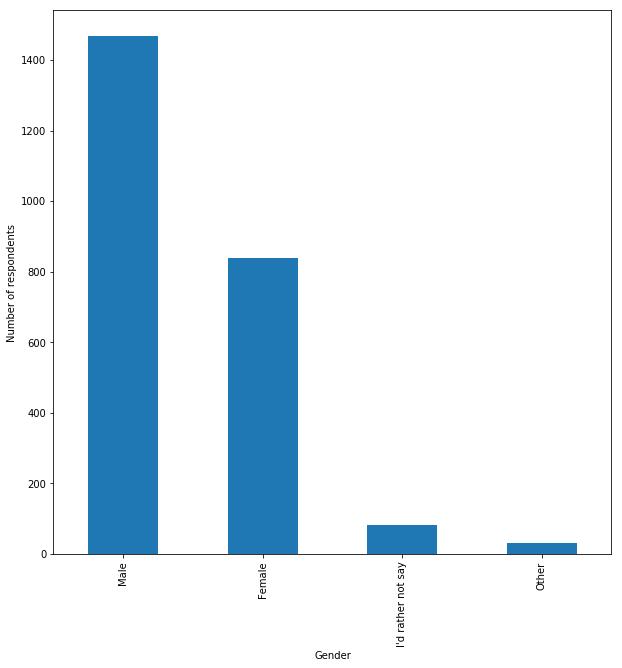

In [99]:
# Plot the number of respondents for each Gender
plt.figure(figsize=(10,10))
plt.ylabel("Number of respondents")
plt.xlabel("Gender")
candy_df['Q2: GENDER'].value_counts().plot.bar()

From the bar graph above, we can see that the majority of respondents were Male. 

## Visualization 2

In [100]:
# Create an age column so we can look at a histogram of ages
candy_df['AGE'] = candy_df['Q3: AGE'].astype(str).str.extract(r'(\d\d)')
candy_df.loc[:,'AGE'] = pd.to_numeric(candy_df.loc[:, 'AGE'], errors='coerce')
candy_df.loc[:,'AGE'].mean()

42.1538789428815

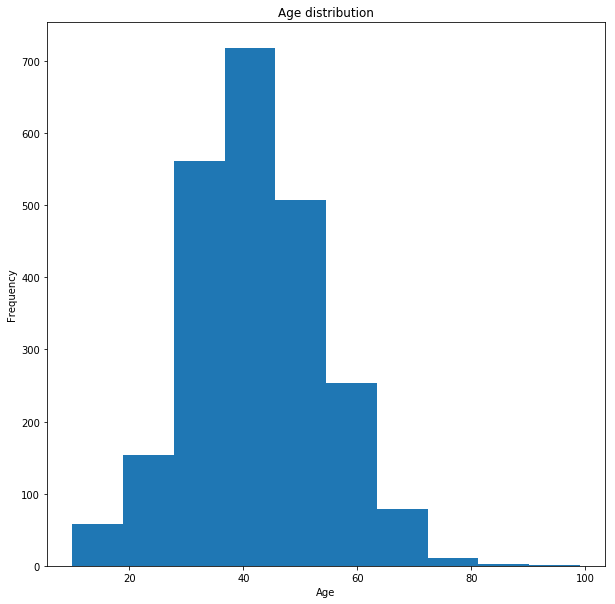

In [101]:
# Create a historgram for ages
plt.figure(figsize=(10,10))
plt.title("Age distribution")
plt.xlabel("Age")
candy_df['AGE'].plot.hist()

# Admittedly, this dataset was a little difficult for me to generate (meaningful) 
# visualizations for.
# The first two feel like I'm just checking a box, but I really wanted to stick with this
# dataset, so I could try to emulate the Boing Boing final result. 
# I've been wanting to make that visualization since we started working with that dataset.

From the histogram above, we can see that the average age is a little over 40. From the mean function, we can see that the average age is 42. 

## Visualization 3

In [102]:
# I'm going to transpose instead of reshape because it's a one liner
candy_transposed = candy_questions_temp.transpose()
# Going to generate the original author's "Net Feelies" category, but I'm just going to 
# call it OVERALL, as in OVERALL score. 
candy_transposed.loc[:,'OVERALL'] = (candy_transposed.loc[:,'JOY'] - candy_transposed.loc[:,'DESPAIR']) / len(candy_df) 


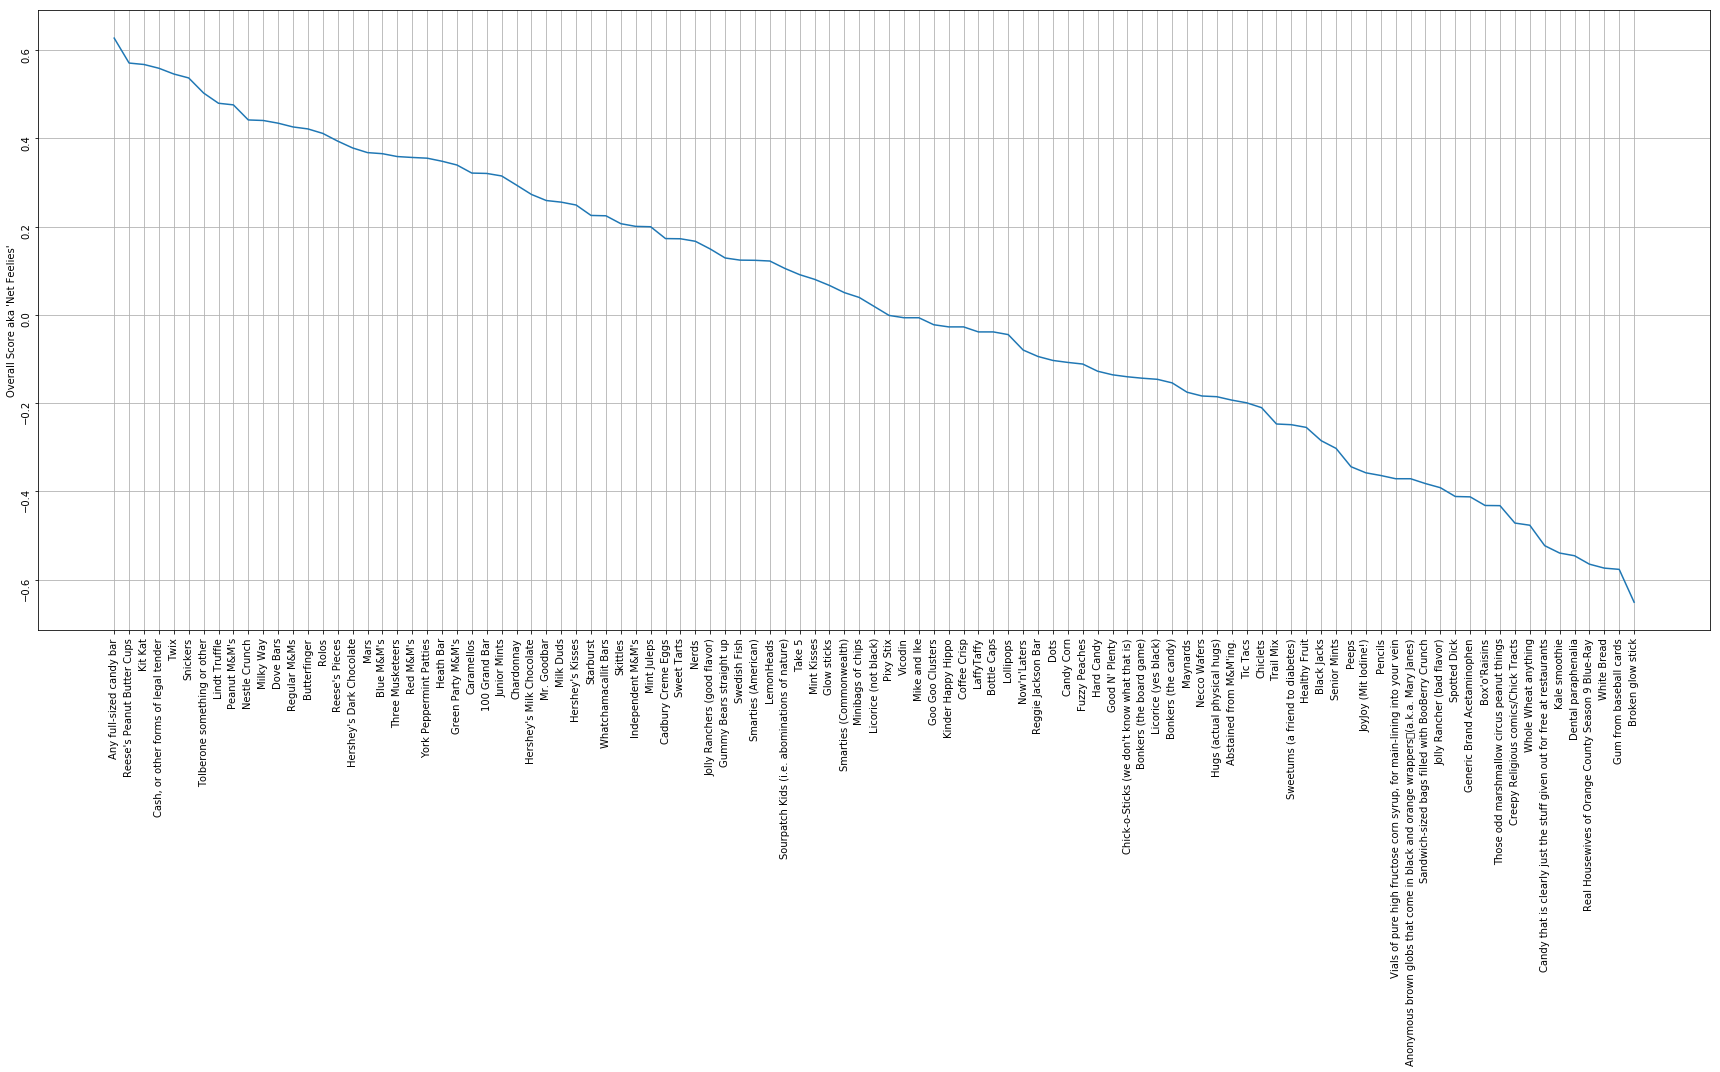

In [103]:
# I really wanted to get somewhat close to the same graph as the original authors
# of the Boing Boing dataset. I spent a long time trying to figure out what they used
# for a graph, but I am pretty happy with the results.
candy_transposed['RANK'] = candy_transposed.loc[:,'OVERALL'].rank()
# Need to make sure it is big enough to read all of the labels
plt.figure(figsize=(24,15))
# I want it to read from left to right starting at the bottom, like the original
# Of course I will have to rotate the image once it's generated
plt.plot(test['OVERALL'].sort_values(ascending=False))
# Rotate the labels so they look right after the image is rotated
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.ylabel("Overall Score aka 'Net Feelies'")
# Put in grid lines
plt.grid()
# X labels were getting cut off
plt.tight_layout()
# Save it so I can open it with pillow and rotate it
plt.savefig("Candy_Ranked.png")


In [104]:
# Image manipulation with PIL or pillow
original = Img.open("Candy_Ranked.png")
# Rotating 90 puts it upside down, so I'm going with 270
corrected = original.transpose(Img.ROTATE_270)
# Save the correct image for display
corrected.save("Ranked_Candy_Rotated.png")


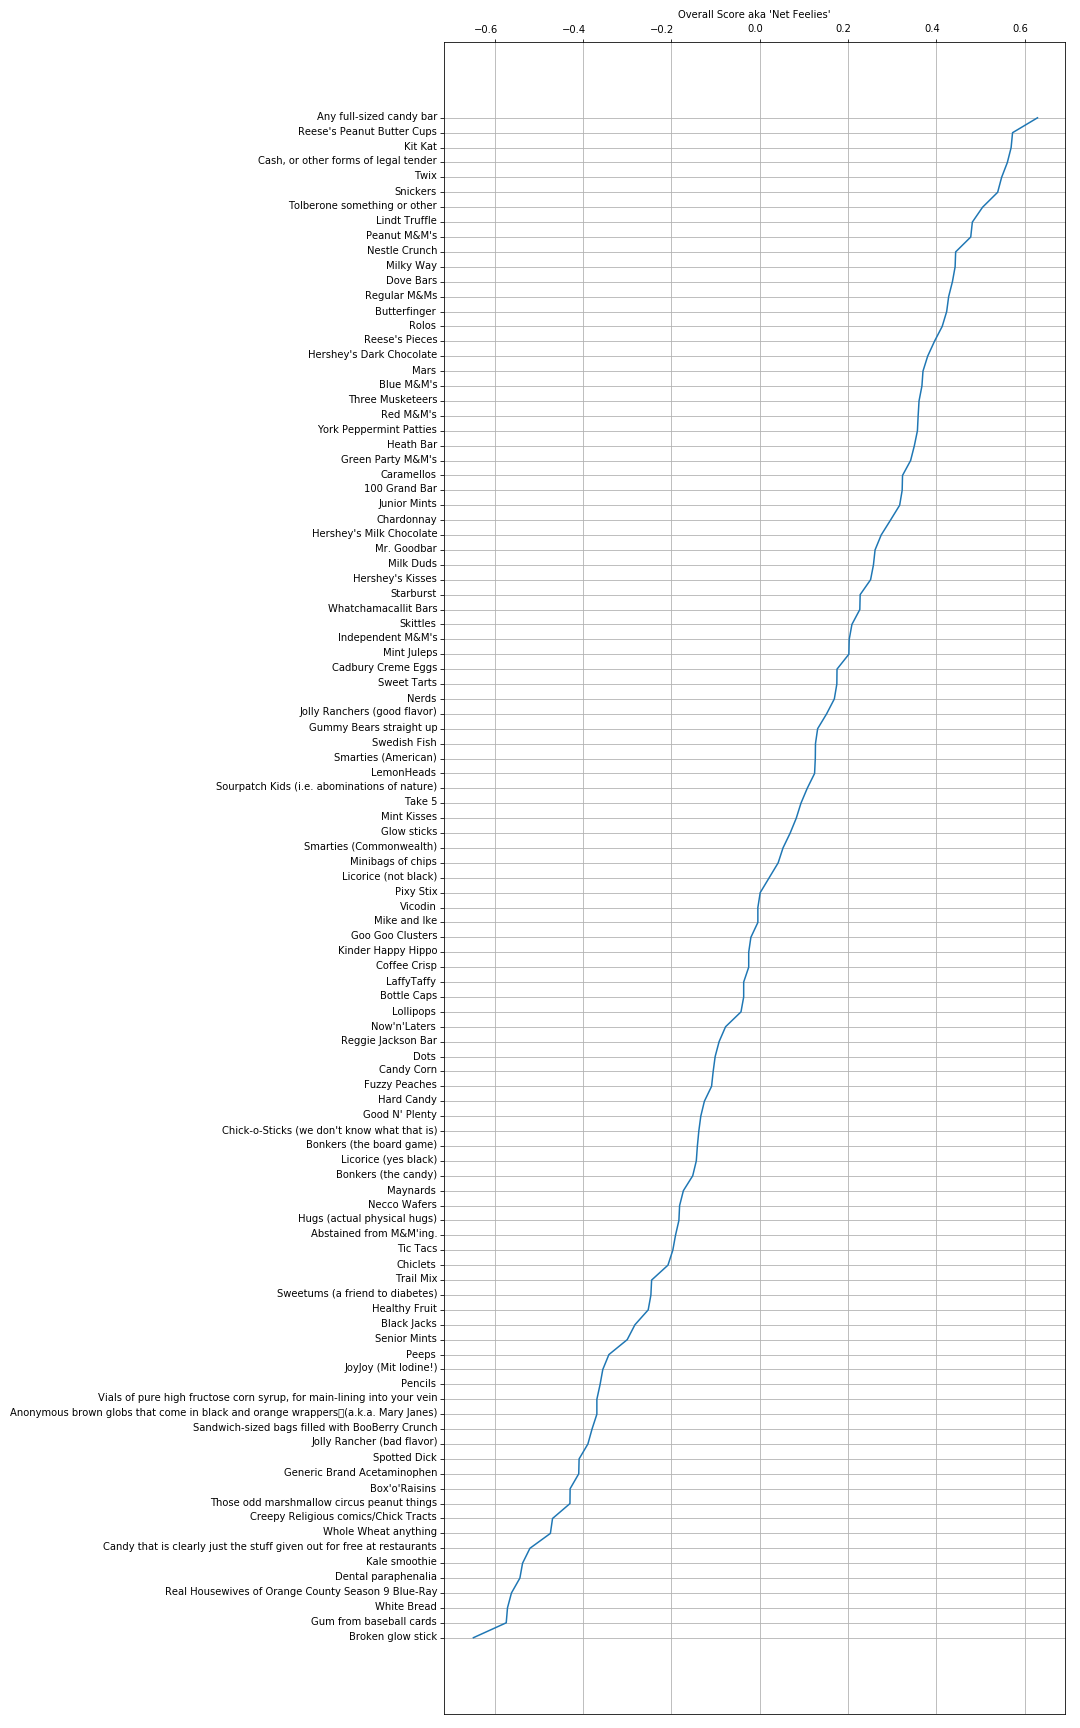

In [105]:
# Display with the cool trick I learned
# Markdown image display was botching the image and resizing wasn't working correctly
display(Image('Ranked_Candy_Rotated.png'))
# Overall it is not perfect, but I'm pretty happy with it. 